## ライブラリのインポート

In [17]:
import numpy as np
#サイキットラーン　（メモリの節約のため、sklearnの中からsvmのみをインポートする
from sklearn import svm
# ワインの計測データ
from sklearn.datasets import load_wine
# 予測結果の精度表示
from sklearn import metrics
# 訓練データと検証データの分割
from sklearn.model_selection import train_test_split
# データを扱う
import pandas as pd
# グラフ描画
from matplotlib import pyplot as plt
import japanize_matplotlib

## テスト用データの読み込み

In [2]:
wine = load_wine()
wine_data=wine.data
wine_target=wine.target

In [3]:
# ワインの計測データの各項目
# 1. alcohol アルコール濃度
# 2. malic_acid リンゴ酸
# 3. ash 灰（？
# 4. alcalinity_of_ash 灰のアルカリ成分（？
# 5. magnesium マグネシウム
# 6. total_phenols 総フェノール類量
# 7. flavanoids フラボノイド（ポリフェノールらしい）
# 8. nonflavanoid_phenols 非フラボノイドフェノール類
# 9. proanthocyanins プロアントシアニジン（ポリフェノールの一種らしい）
# 10. color_intensity 色の強さ
# 11. hue 色合い
# 12. od280/od315_of_diluted_wines ワインの希釈度合い
# 13. proline プロリン（アミノ酸の一種らしい）

# ワインの計測データを表形式で表示
df_x=pd.DataFrame(wine.data ,columns=wine.feature_names)
df_x.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [4]:
# ワインの種類の名前
print(wine.target_names)

['class_0' 'class_1' 'class_2']


In [5]:
# ワインの計測データを分類結果で表示 (targetに分析結果が格納されている)
df_y=pd.DataFrame(wine.target ,columns=['target'])
# 0～58 までの59個の分類結果が"0" class_0
df_y[0:11]

,target
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [6]:
# 50～129 までの80個の分類結果が"1" class_1
df_y[50:65]

,target
50,0
51,0
52,0
53,0
54,0
55,0
56,0
57,0
58,0
59,1


In [7]:
# 130～178 までの49個の分類結果が"2" class_2
df_y[120:135]

,target
120,1
121,1
122,1
123,1
124,1
125,1
126,1
127,1
128,1
129,1


In [8]:
len(df_y)

178

## 特微量のペアプロット（データ可視化）

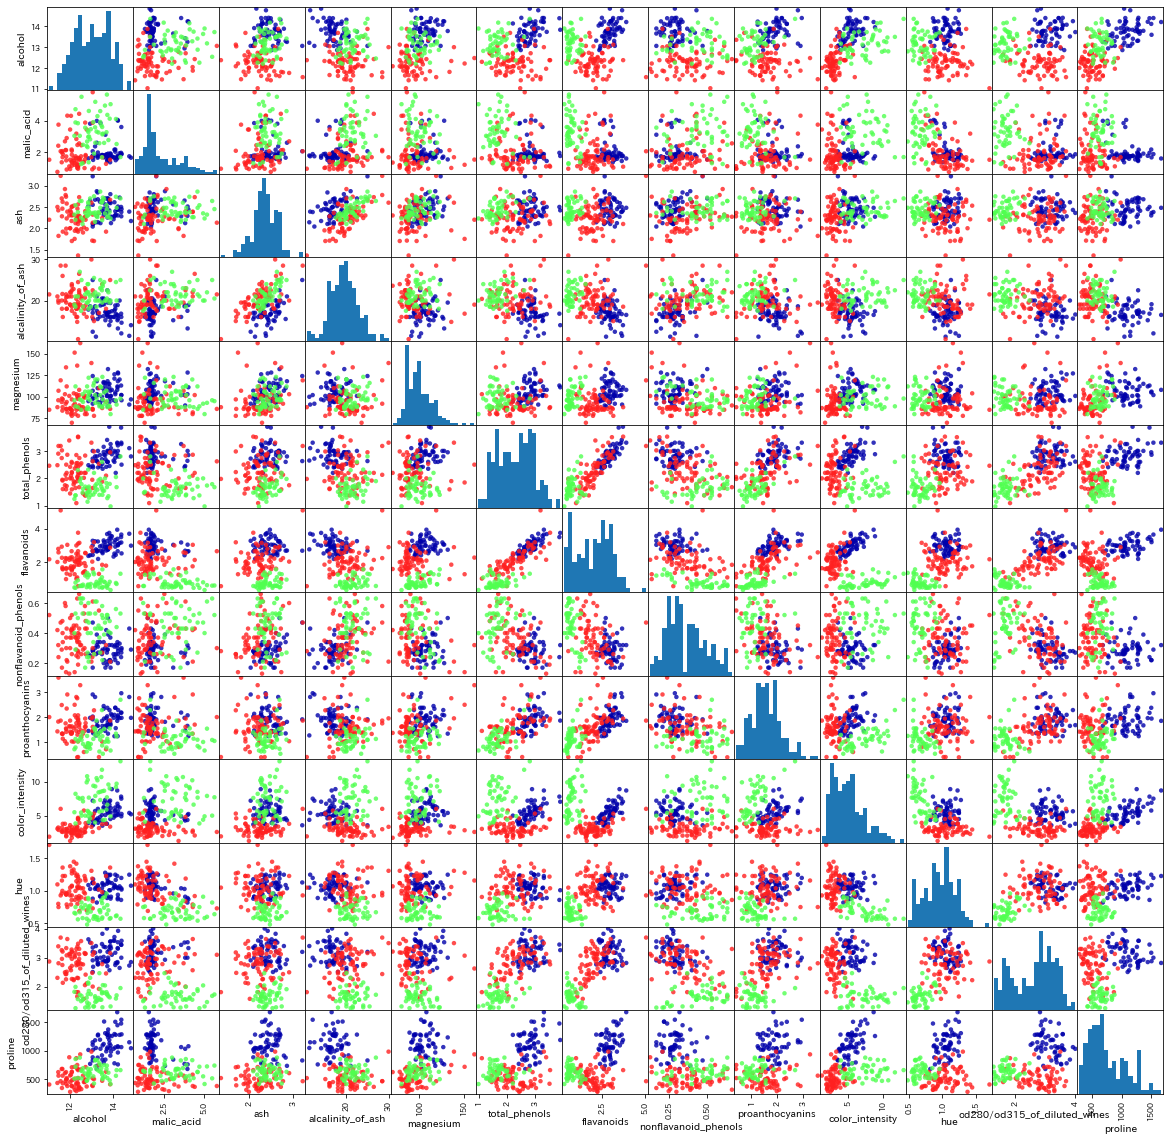

In [9]:
# DataFrameからscatter_matrixを作成
from pandas.plotting import scatter_matrix
import mglearn
grr = scatter_matrix(df_x, c=wine.target, figsize=(20, 20), marker='o', hist_kwds={'bins': 20}, s=20, alpha=.8, cmap=mglearn.cm3)
plt.show()

## 訓練データと検証データに分割する

In [10]:
# 訓練データと検証データの分割
# random_stateは再現性を確保するために指定する
X_train,X_test,y_train,y_test=train_test_split(wine_data, wine_target, test_size=0.4, random_state=1) 

## 学習する

In [11]:
# サポートベクターマシーン
clf = svm.SVC()  
# 訓練
clf.fit(X_train, y_train)  

SVC()

## 予測値と正解の比較

In [12]:
y_hat = clf.predict(X_test)  # テストデータで予測
print(metrics.classification_report(y_test, y_hat))  # 正解率など
print('-----')
print(metrics.confusion_matrix(y_test, y_hat))  # 行:正解、列:予測

              precision    recall  f1-score   support

           0       0.92      0.86      0.89        28
           1       0.65      0.81      0.72        27
           2       0.42      0.29      0.34        17

    accuracy                           0.71        72
   macro avg       0.66      0.66      0.65        72
weighted avg       0.70      0.71      0.70        72

-----
[[24  0  4]
 [ 2 22  3]
 [ 0 12  5]]


## 検証データを使って予測値の検証

In [13]:
# 検証 <-訓練データ 
clf.score(X_train ,y_train)

0.7169811320754716

In [14]:
# 検証 <-検証データ
# (検証データと値が近いなら信用できる。
#  どこまでの差異を近いとするかはそれぞれ
#  判断する必要がある。)
clf.score(X_test,y_test)

0.7083333333333334

## 予測値の散布図描画

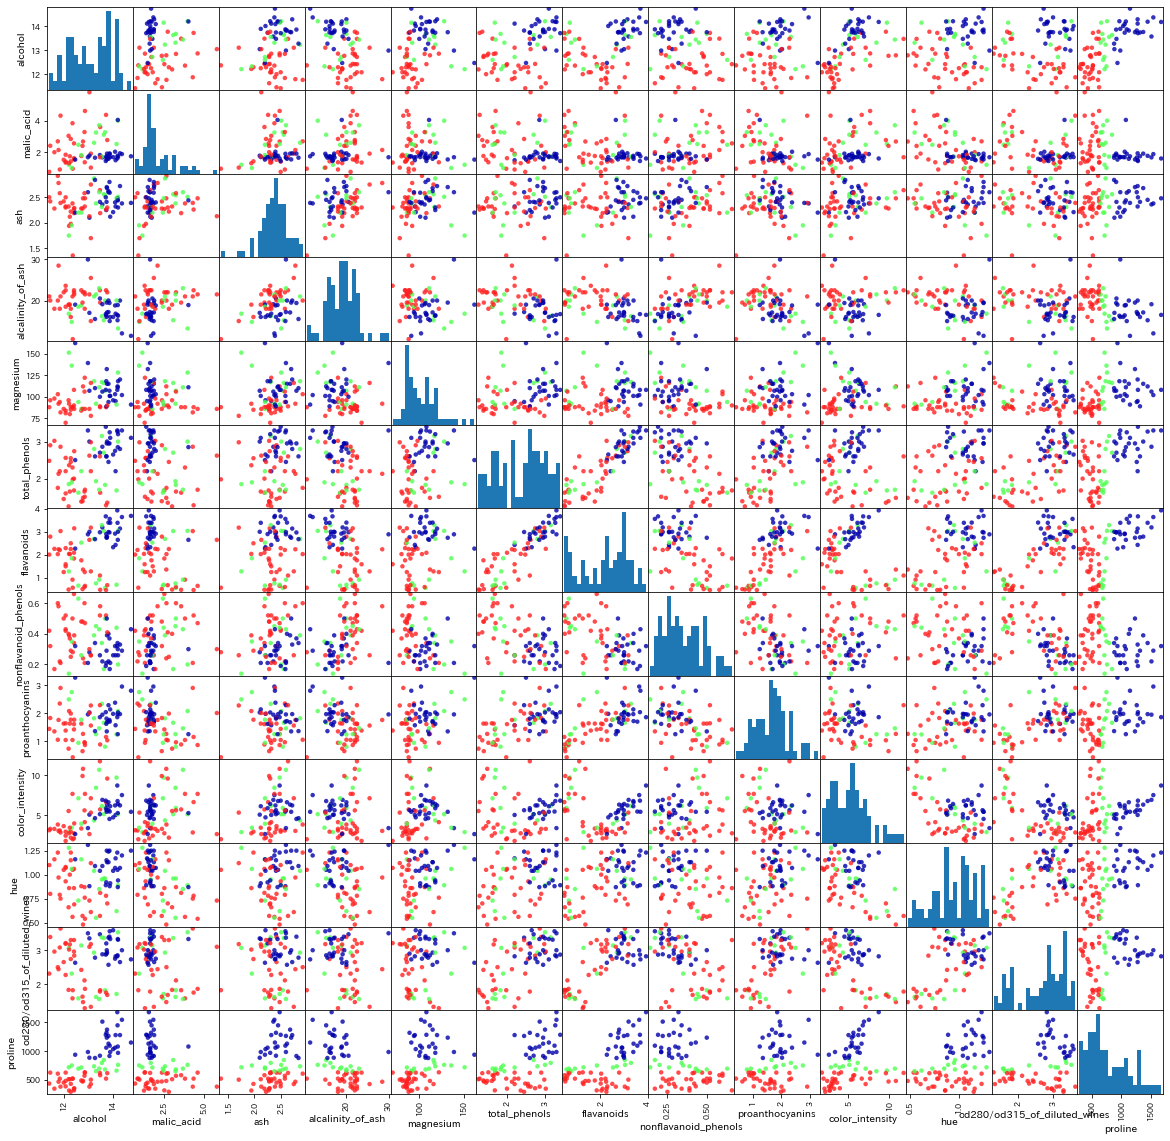

In [15]:
df_x_test=pd.DataFrame(X_test ,columns=wine.feature_names)
grr = scatter_matrix(df_x_test, c=y_hat, figsize=(20, 20), marker='o', hist_kwds={'bins': 20}, s=20, alpha=.8, cmap=mglearn.cm3)
plt.show()

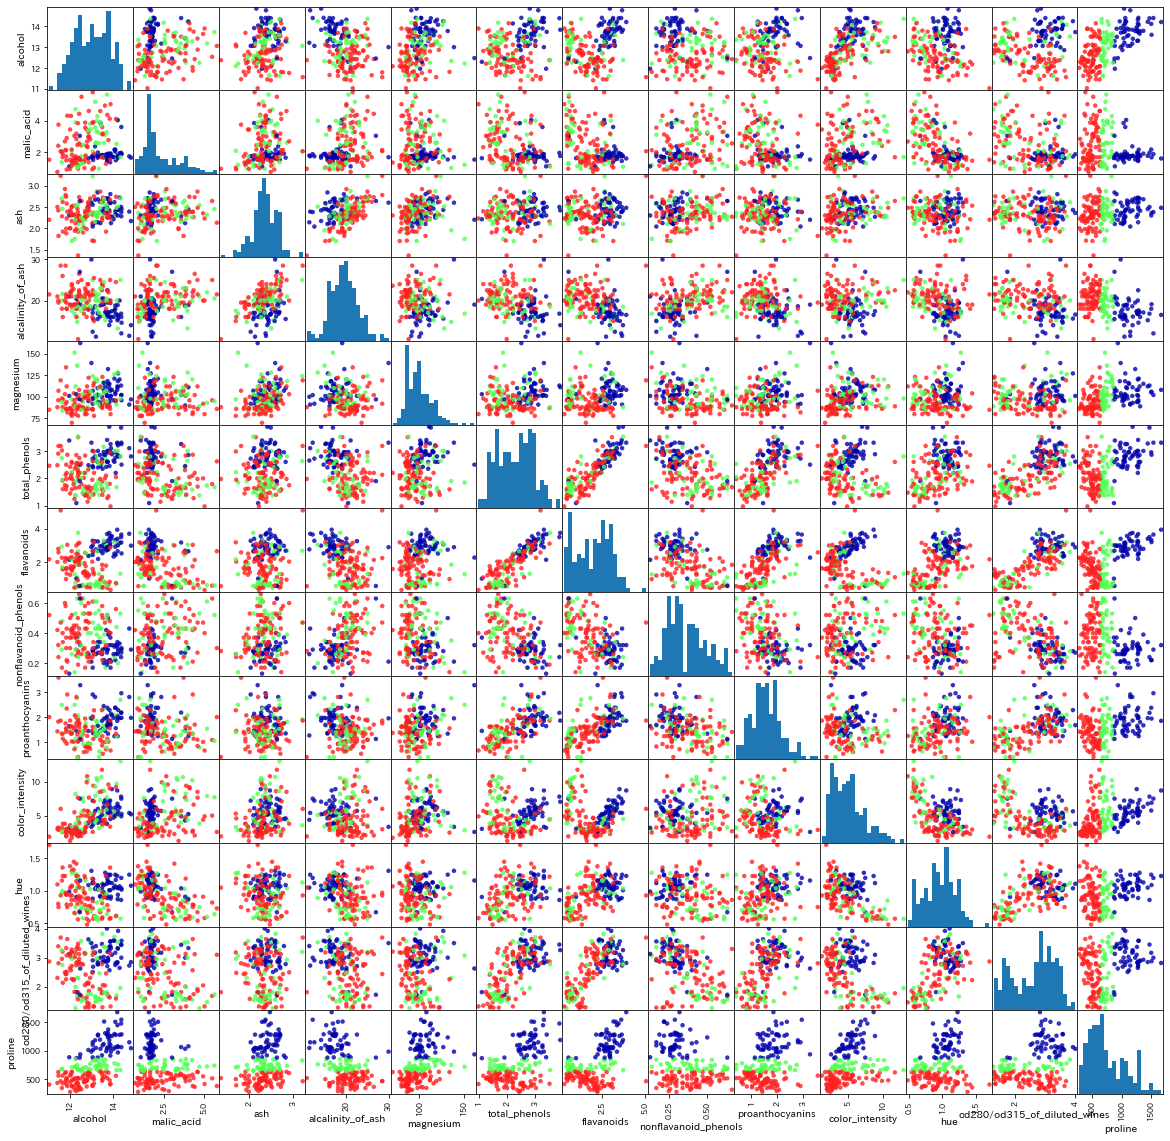

In [16]:
y_hat2 = clf.predict(wine_data)  # 全データで予測
df_x_test=pd.DataFrame(wine_data ,columns=wine.feature_names)
grr = scatter_matrix(df_x_test, c=y_hat2, figsize=(20, 20), marker='o', hist_kwds={'bins': 20}, s=20, alpha=.8, cmap=mglearn.cm3)
plt.show()

In [19]:
y_hat2 = clf.predict(wine_data)  # テストデータで予測
print(metrics.classification_report(wine_target, y_hat2))  # 正解率など
print('-----')
print(metrics.confusion_matrix(wine_target, y_hat2))  # 行:正解、列:予測

              precision    recall  f1-score   support

           0       0.91      0.85      0.88        59
           1       0.68      0.79      0.73        71
           2       0.51      0.44      0.47        48

    accuracy                           0.71       178
   macro avg       0.70      0.69      0.69       178
weighted avg       0.71      0.71      0.71       178

-----
[[50  0  9]
 [ 4 56 11]
 [ 1 26 21]]


## 予測する

In [34]:
def print_predict(_x , _y):
    print('入力データ',_x)
    y_predict = clf.predict(_x)
    print('予測値',y_predict)
    print('正解',_y)

In [37]:
# 全データの１件目　　：　Class_0
print_predict(wine_data[0:1] , wine_target[0:1])

入力データ [[1.423e+01 1.710e+00 2.430e+00 1.560e+01 1.270e+02 2.800e+00 3.060e+00
  2.800e-01 2.290e+00 5.640e+00 1.040e+00 3.920e+00 1.065e+03]]
予測値 [0]
正解 [0]


In [38]:
# 全データの５９件目：　Class_1
print_predict(wine_data[59:60] , wine_target[59:60])

入力データ [[1.237e+01 9.400e-01 1.360e+00 1.060e+01 8.800e+01 1.980e+00 5.700e-01
  2.800e-01 4.200e-01 1.950e+00 1.050e+00 1.820e+00 5.200e+02]]
予測値 [1]
正解 [1]


In [39]:
# 全データの１３０件目：　Class_2
print_predict(wine_data[130:131] , wine_target[130:131])

入力データ [[1.286e+01 1.350e+00 2.320e+00 1.800e+01 1.220e+02 1.510e+00 1.250e+00
  2.100e-01 9.400e-01 4.100e+00 7.600e-01 1.290e+00 6.300e+02]]
予測値 [1]
正解 [2]
